# Pipe3D dataproducts
## How to use the data products (manga-XXXX-YYYY.Pipe3D.cube.fits.gz)


The manga.Pipe3D.cube are the FITs files that comprises the dataproducts derived using Pipe3D for the 2810 analyzed galaxy datacubes. For DR14, the version of Pipe3D used was PIPE3D_VER=2.1.2, and this was run on MANGADRP_VER=v2_1_2 reduced data. Each FITs file comprises five extensions. The first extension is just the header of the original MaNGA cube (including the astrometry WCS that can be used for rest of the extensions), while the remaining four extensions correspond to datacubes including different sets of dataproducts described below. Each of those datacubes are formed by a set of individual maps, each one storing the spatial distribution of a particular physical or observational property, with the same WCS of the original MaNGA datacube, regarding the position in the sky.

The files ares stored in the https://data.sdss.org/sas/dr14/manga/spectro/pipe3d/v2_1_2/2.1.2/

### How to get the data
First load the functions library

In [1]:
import numpy as np
import functions as fn
%matplotlib inline
path_b="/usr/local/bin/"

Select your favorite manga galaxy:

In [2]:
manga_name="manga-7495-12704"

We use the function <b>get_data</b> to download the correspoding file for the public SDSS server. In this example the value of the variable <b>dir_o</b> (or <b>dir_data</b> for the plot_maps funtion) gives the directory where the data will be stored.

In [3]:
fn.get_data(manga_name,dir_o="files",path_bin=path_b)

Download successfully


### Undertanding the cube informationtion
The dataproducts contains 4 principal extentions: 
1. The average stellar population properties
2. Stellar decomposition weights extension (SFH)
3. The parameters of the analyzed emission lines
4. The stellar indices derived for the stellar population

The function <b>plot_maps</b> automatically looks for the specific map and plot it, save and extract the corresponding numerical values. To extract the maps the user needs to provide the name of the galaxy (<b>manga_name</b> in this case) and the name of the map that the user wants. To obtain all the names of the maps and a detailed information of the use of this function, the user needs to set <b>type=<font color="red">"Help"</font></b>:

In [4]:
fn.plot_maps(manga_name,type="Help",path_bin=path_b,dir_data="files",dir_p="plots")

Usage of plot_maps function:
plot_maps(manga_name,type=TYPE,dir_p=dip,hdu=HDU,channel=CHANEL,dir_data=dir_d,plot=plot,outp=outp,log_f=log_f)

type: name of the map that you want to plot, default=Ha_flux
hdu: number of the extension that you want to use, if type is given hdu is not mandatory
channel: number of the channel that you want to use, if type is given channel is not mandatory
dir_p: Directory where you want to save the output plots, default is ./
dir_p: Directory where you have the input fit files, default is ./, if there is no files it will be automatically download
plot: If 0 there are no output plots, if 1 there are a pdf output plots, if 2 there are screen output plots, default 1
outp: If 1, the numerical array of the map TYPE will be given as an output, default 0
log_f: If 0 the flux plots will be plotted in lineal form, If 1 the flux plots will be plotted in logarithmic form, default 0

These are the possible values of hdu, channel and type variables:

HDU,CHANNEL,TYPE co

## Playing with the data

The next line shows an example when the user wants to obtain the plot of the flux map on the V-band, and save it in the directory  <b><font color="red">"plots"</font></b>:

In [5]:
fn.plot_maps(manga_name,type="V-band",path_bin=path_b,dir_data="files",dir_p="plots")

If the user only wants display the map without save it, the user only wants to use the key word <b>plot=<font color="green">2</font></b> as follows:

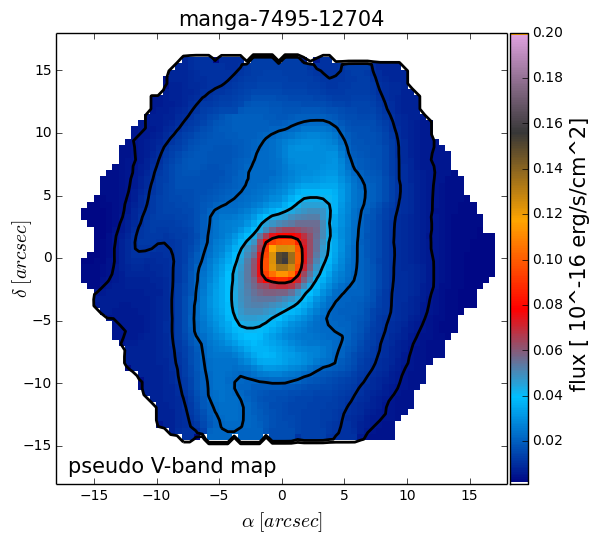

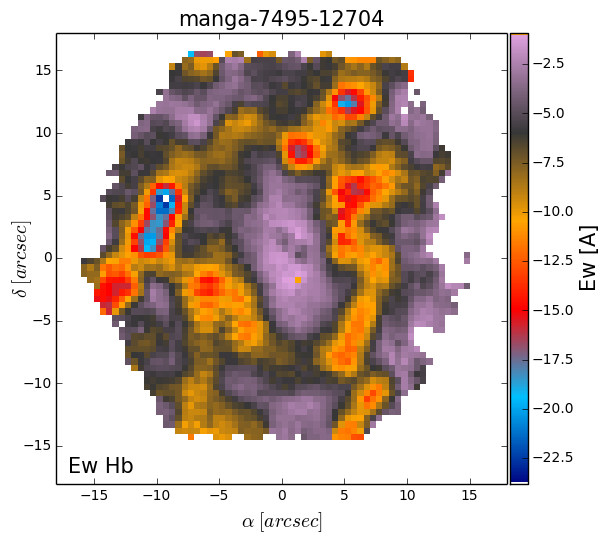

Download successfully


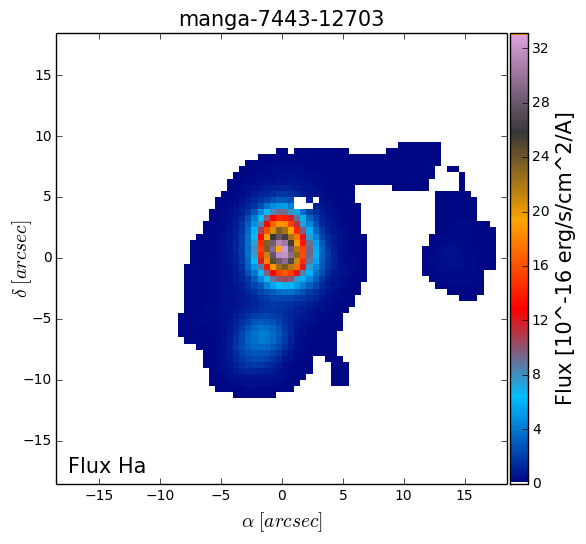

In [6]:
fn.plot_maps(manga_name,type="V-band",path_bin=path_b,dir_data="files",dir_p="plots",plot=2)
fn.plot_maps(manga_name,type="Ew_Hb",path_bin=path_b,dir_data="files",dir_p="plots",plot=2)
fn.plot_maps("manga-7443-12703",type="Flux_Ha",path_bin=path_b,dir_data="files",dir_p="plots",plot=2)

In the last example the galaxy name <font color="red">"manga-7443-12703"</font> was not previusly downloaded but the function automatically download it if not exists in the directory <b>dir_data</b>.

If the user wants to recuperate the values into a 2d array, the key word <b>outp=<font color="green">1</font></b> must be added: 

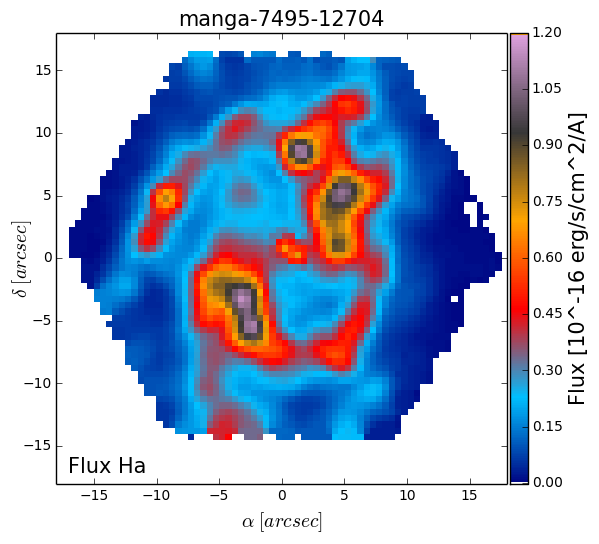

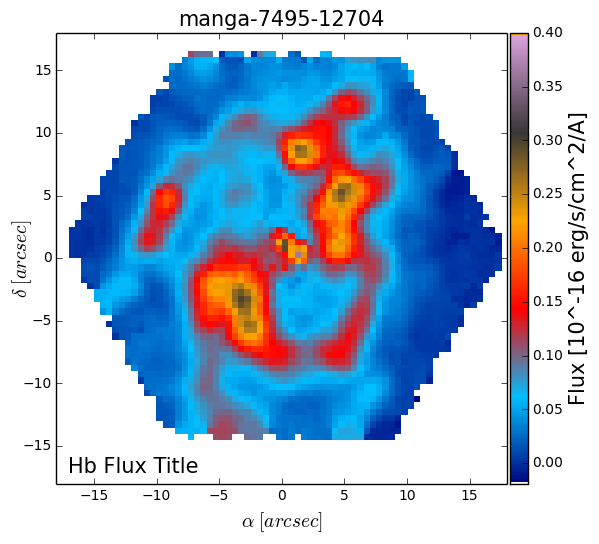

In [7]:
Ha_m=fn.plot_maps(manga_name,type="Flux_Ha",path_bin=path_b,dir_data="files",plot=2,outp=1)
Hb_m=fn.plot_maps(manga_name,type="Hb_Flux Title",path_bin=path_b,dir_data="files",plot=2,outp=1,channel=28,hdu=3)

Again, in the last example the keywords <b>chanel=<font color="green">28</font></b> and <b>hdu=<font color="green">3</font></b>  are set, returning the flux map of $H_{\beta}$, when these keywords are set the key word <b>type</b> is ignored.

Now we use the numerical 2d maps of the flux of $H_{\beta}$ and $H_{\beta}$ to obtain the map of the ratio of $H_{\beta}/H_{\beta}$, and display the resulting map with the funtion <b>map_plot</b>:

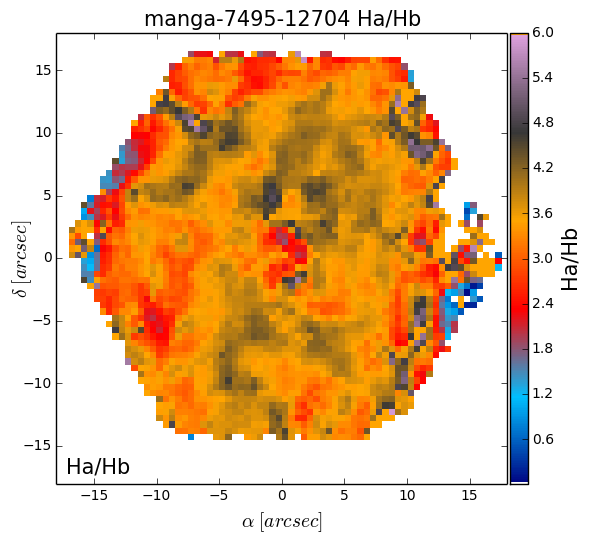

In [8]:
HaHb=Ha_m/Hb_m
HaHb[np.isnan(HaHb)]=0
fn.map_plot(HaHb,"Ha/Hb",legen='Ha/Hb',dir="plots/",pdf=2,title='manga-7495-12704 Ha/Hb',fname='manga-7495-12704_map_HaHb',rad=0,minval=0.01,maxval=6)

Now we extract the Stellar mass corrected by dust extintion (<b>M_m</b>), the median stellar flux (<b>S_m</b>) and the standar deviation of the stellar flux (<b>N_m</b>). With <b>S_m</b> and <b>N_m</b> we define a SNR as <b>S_m/N_m</b> and display its map:

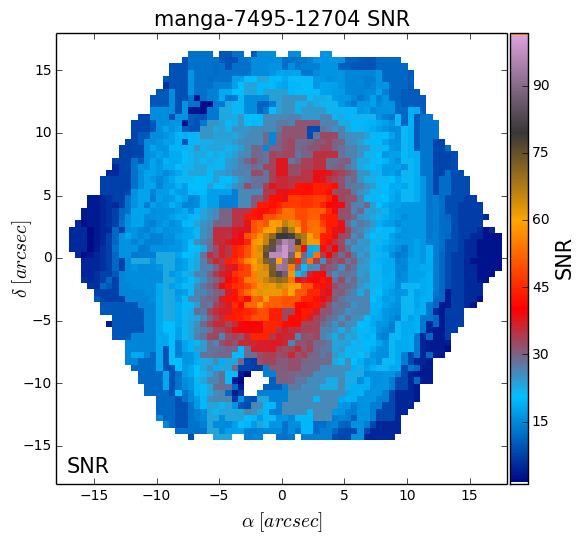

In [9]:
M_m=fn.plot_maps(manga_name,type="Stellar_Mass_d",path_bin=path_b,dir_data="files",plot=0,outp=1)
S_m=fn.plot_maps(manga_name,type="Median_flux",path_bin=path_b,dir_data="files",plot=0,outp=1)
N_m=fn.plot_maps(manga_name,type="StdDev_flux",path_bin=path_b,dir_data="files",plot=0,outp=1)
SN_m=S_m/N_m
fn.map_plot(SN_m,"SNR",legen='SNR',dir="plots/",pdf=2,title='manga-7495-12704 SNR',rad=0)

With the previus SNR map we can select all the <i>spaxels</i> with a SNR greater than 20, and plot how the resolved <i>spaxels</i> of the flux in $H_{\alpha}$ relate with the resolved <i>spaxels</i> of stellar mass $M_{\star}$: 

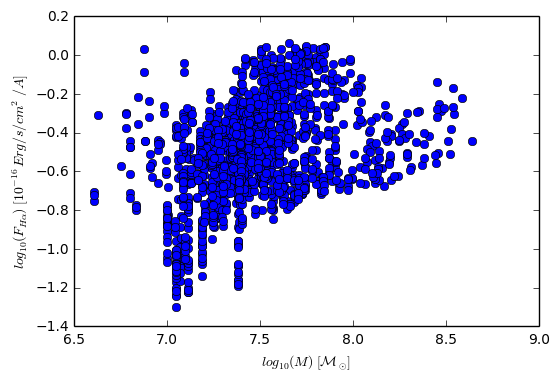

In [10]:
Ha_m[np.isnan(Ha_m)]=0
SN_m[np.isnan(SN_m)]=0
M_m[np.isnan(M_m)]=0
nt=np.where(SN_m > 20)
M=M_m[nt].ravel()
Ha=Ha_m[nt].ravel()

import matplotlib.pyplot as plt
plt.xlabel(r'$log_{10}(M)\ [\mathcal{M}_{\odot}]$')
plt.ylabel(r'$log_{10}(F_{H\alpha})\ [10^{-16}Erg/s/cm^2/A]$')
plt.plot(M,np.log10(Ha),"o")
plt.show()

In a similar way, we also extract the corresponding map of the luminosity weighted age ($Age_{lw}$) and the map of the $D_{4000}$ index, plot its maps, select the select all the <i>spaxels</i> with a SNR greater than 20 and obtain the local relation bewteen the Age and the $D_{4000}$ index:

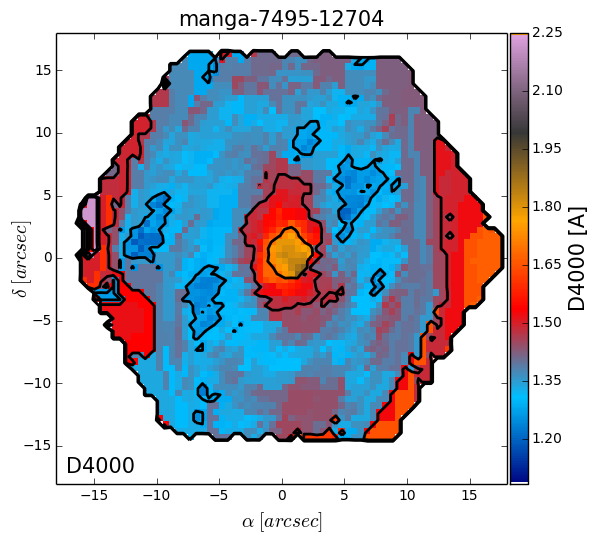

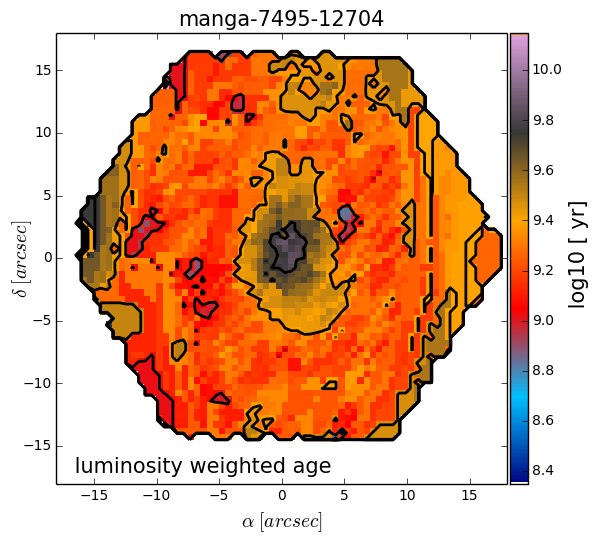

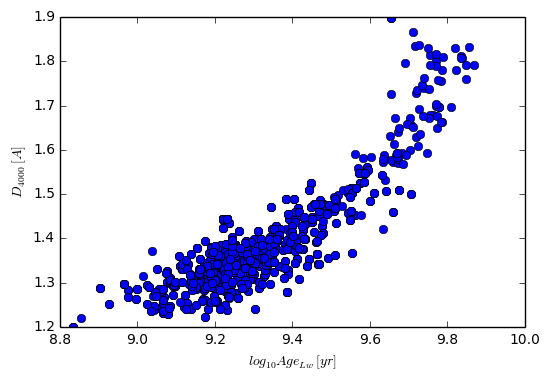

In [11]:
D4_m=fn.plot_maps(manga_name,type="D4000",path_bin=path_b,dir_data="files",dir_p="plots",plot=2,outp=1)
Al_m=fn.plot_maps(manga_name,type="Age_LW",path_bin=path_b,dir_data="files",dir_p="plots",plot=2,outp=1)
D4=D4_m[nt].ravel()
Al=Al_m[nt].ravel()

import matplotlib.pyplot as plt
plt.xlabel(r'$log_{10}Age_{Lw}\ [yr]$')
plt.ylabel(r'$D_{4000}\ [A]$')
plt.plot(Al,D4,"o")
plt.show()

## Recuperating the SFHs
### Obtaining the Stellar decomposition Flux fractions
To obtain the corresponding flux fractions from the stellar decomposition analysis of <b>Pipe3D</b>, you can use the keyword <b>type=<font color="red">"SFH_AGE_MET"</font></b> as follows:

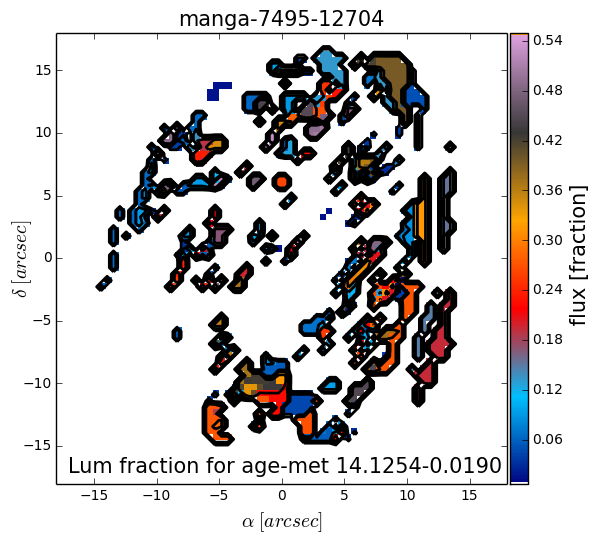

In [12]:
fn.plot_maps(manga_name,type="SFH_14_0.02",path_bin=path_b,dir_data="files",dir_p="plots",plot=2)

Now, we will obtain all the flux fraction for all the age steps of the <b>Pipe3D</b> stellar library and save it in a 3D numerical array:

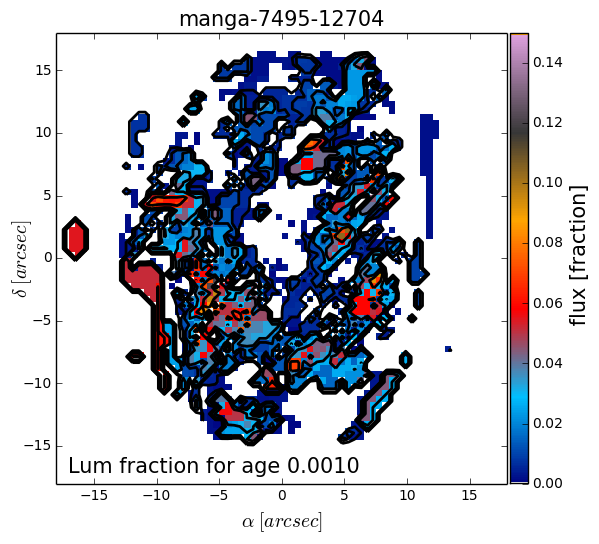

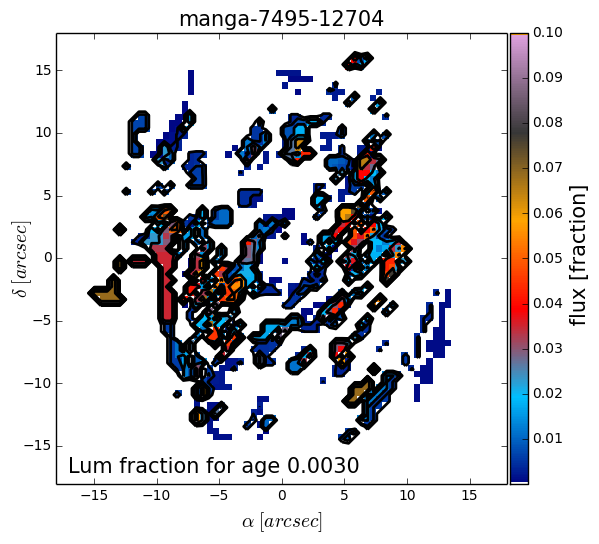

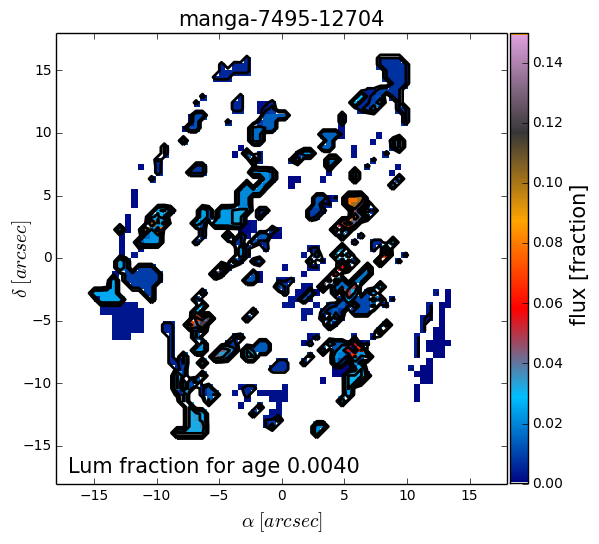

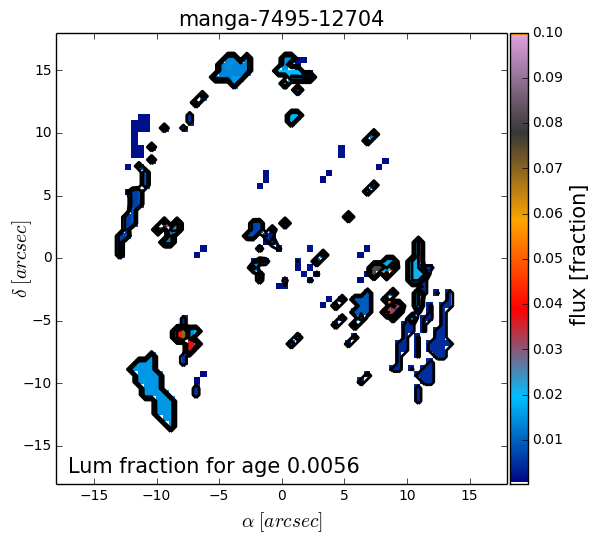

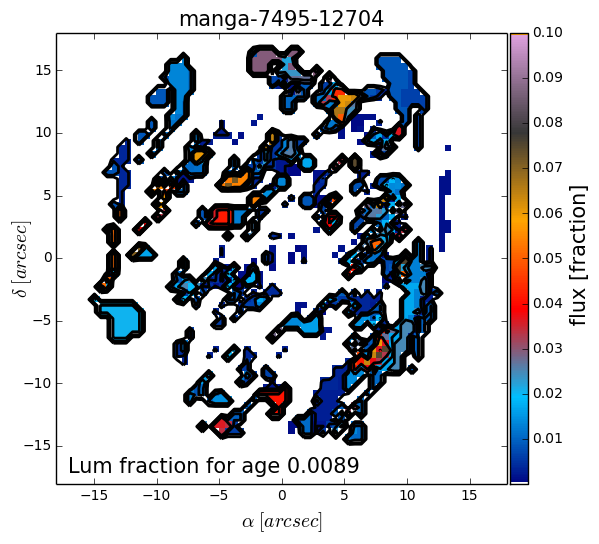

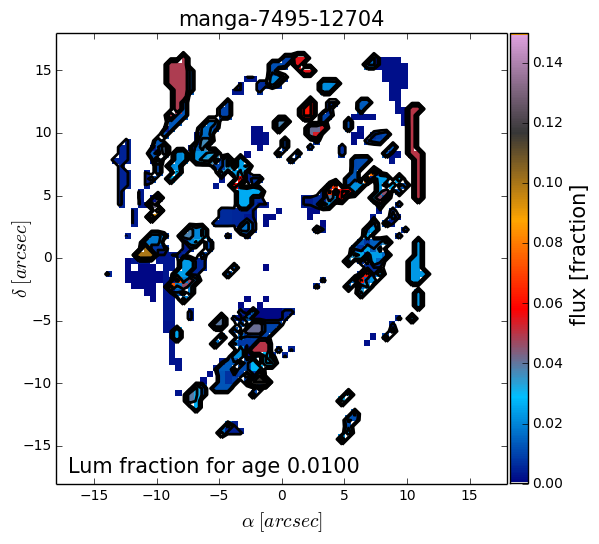

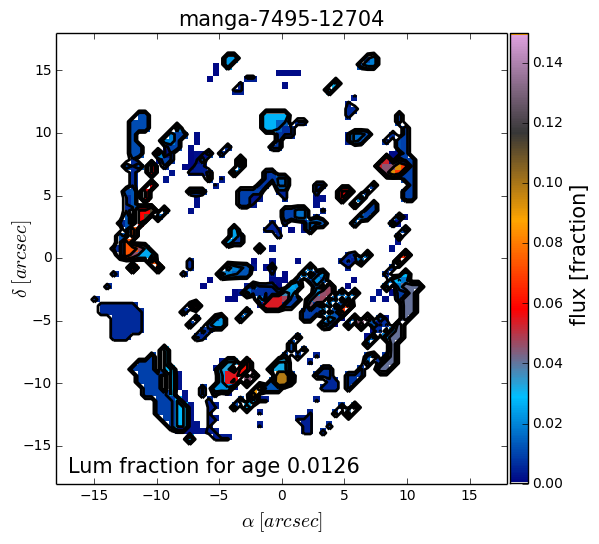

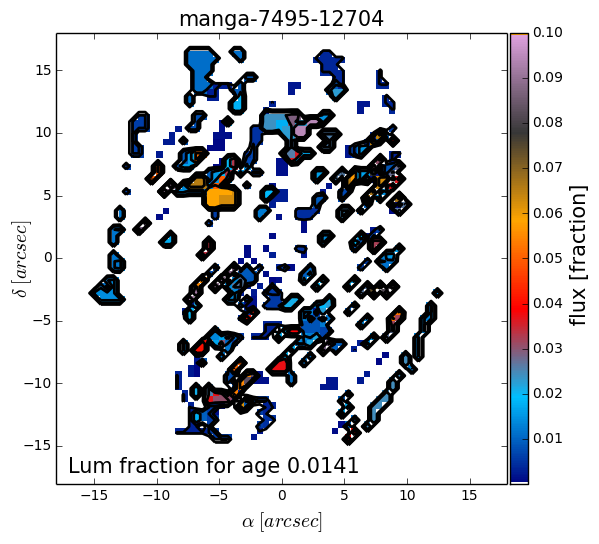

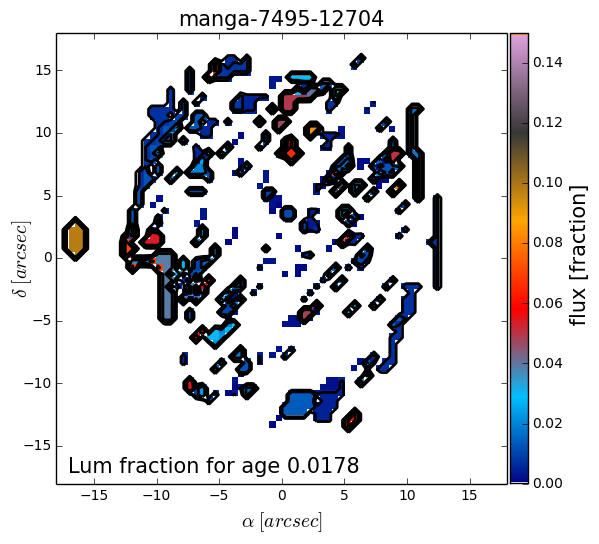

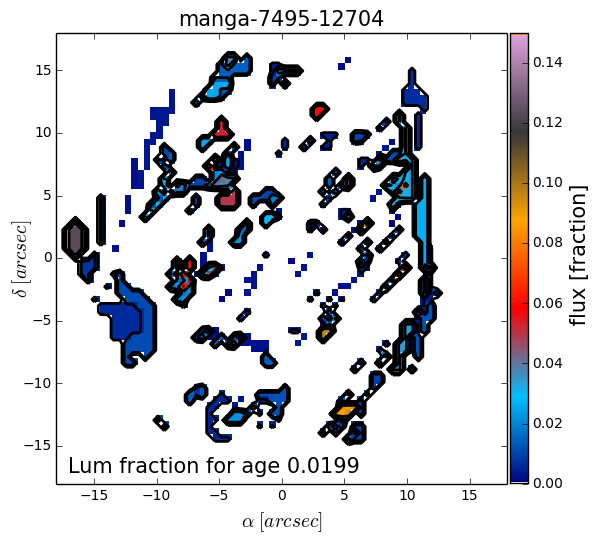

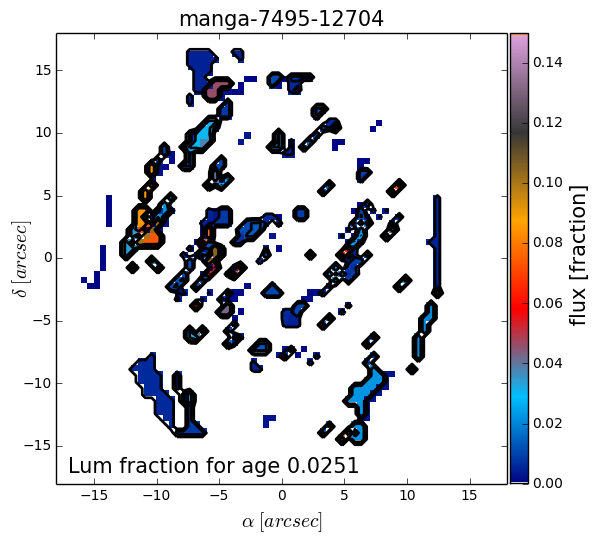

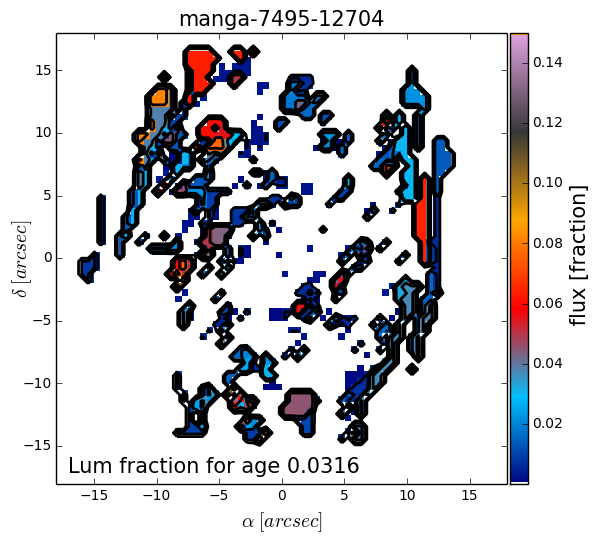

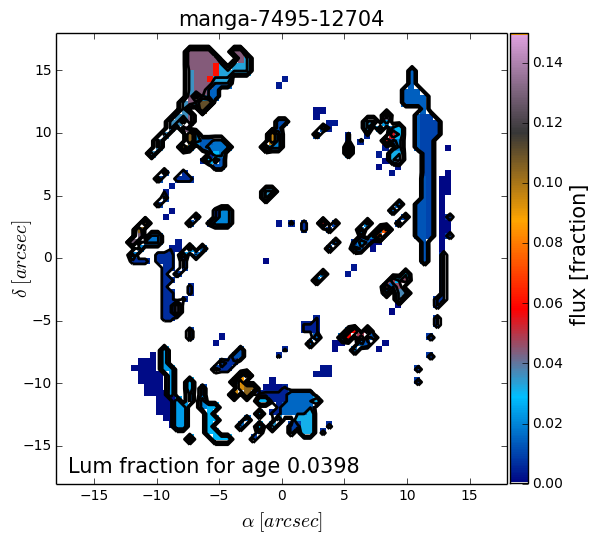

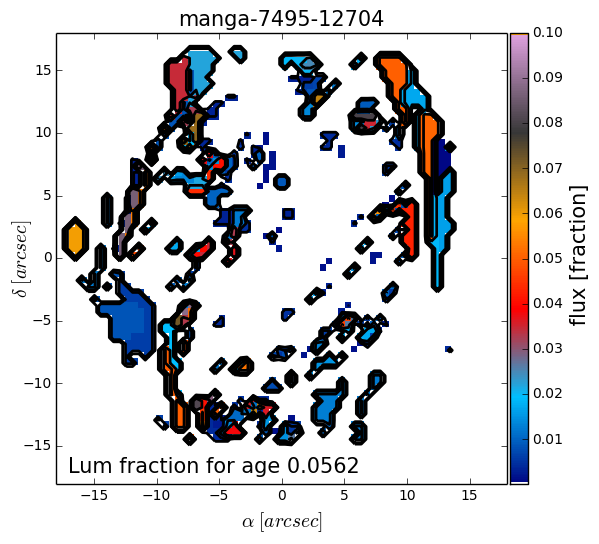

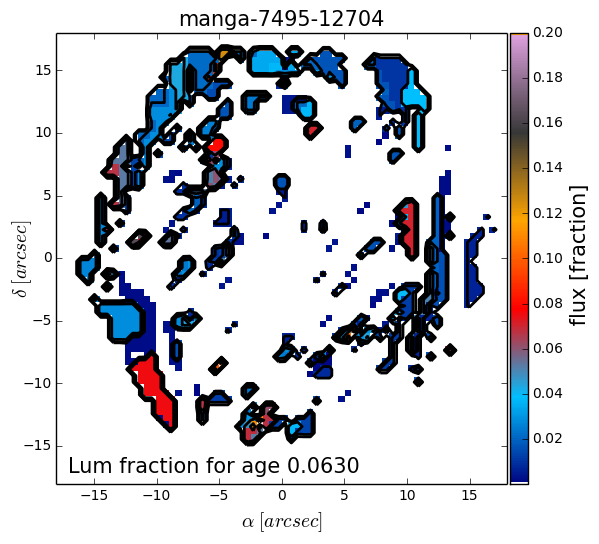

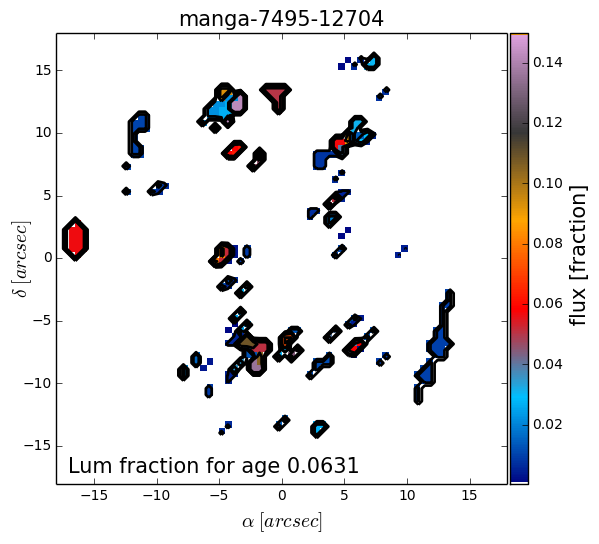

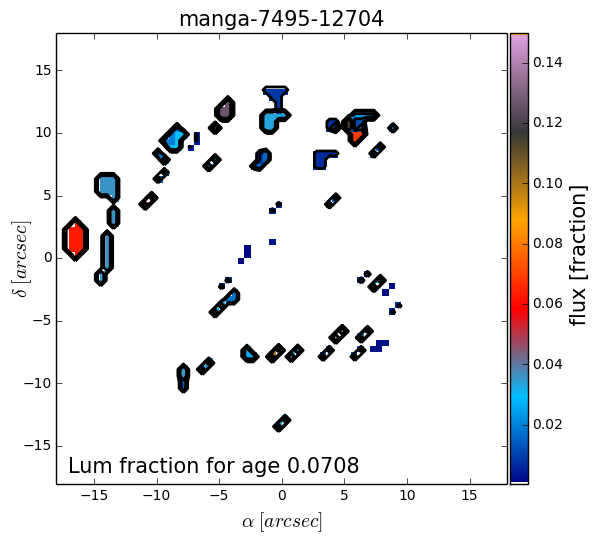

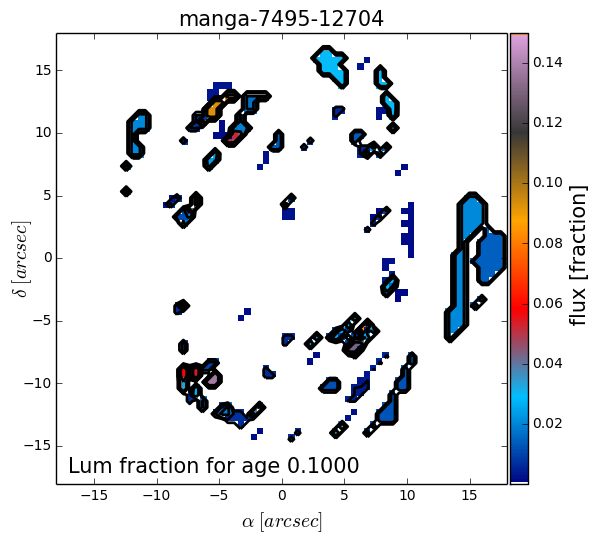

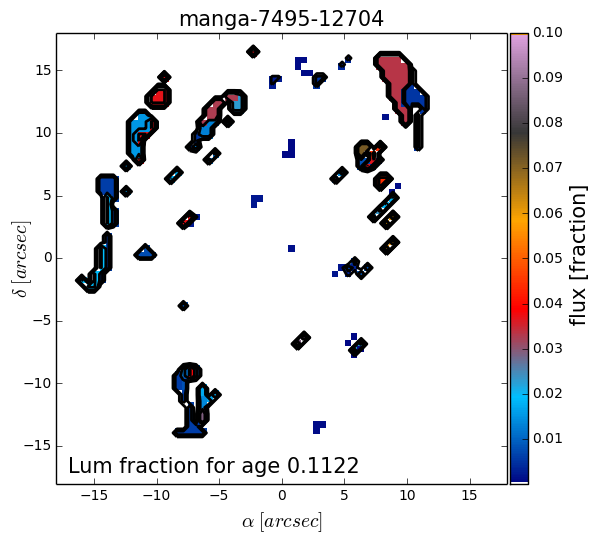

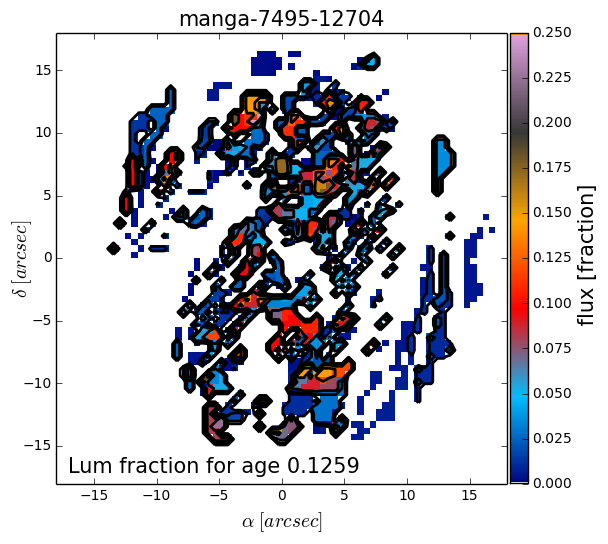

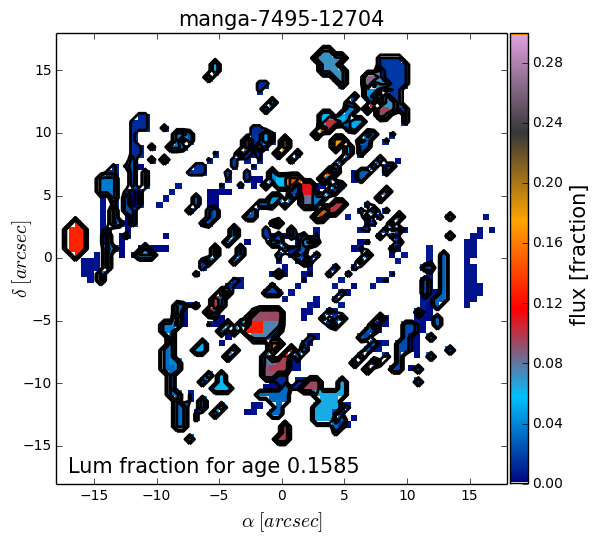

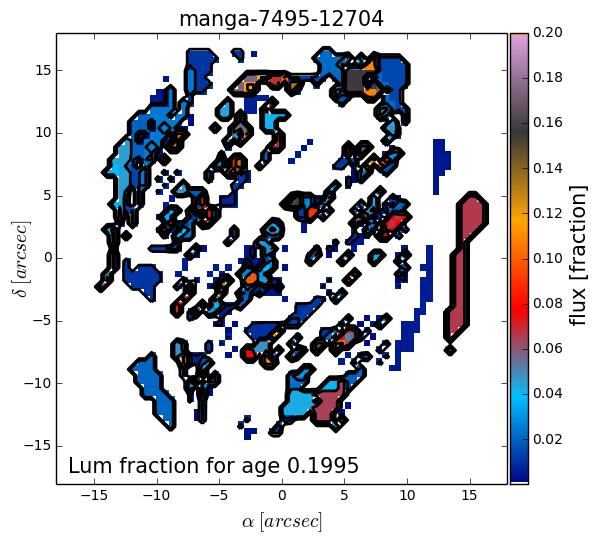

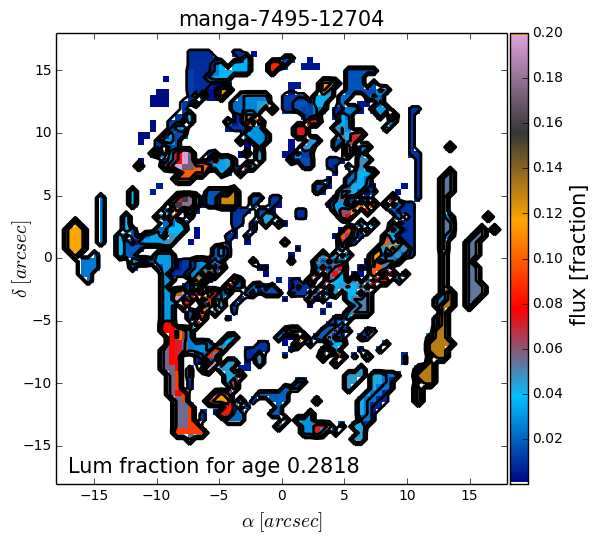

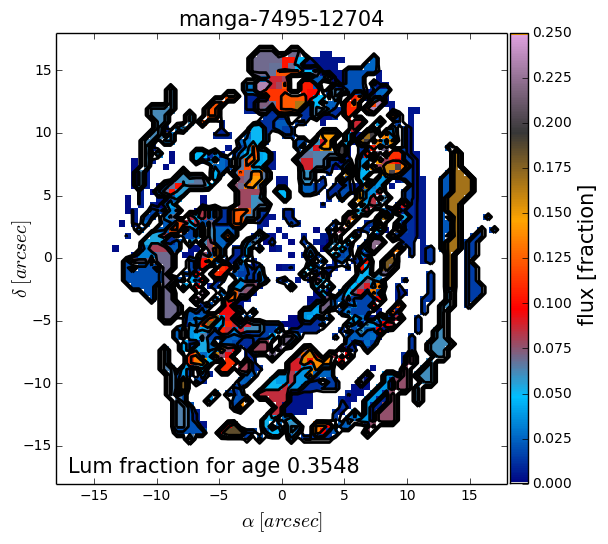

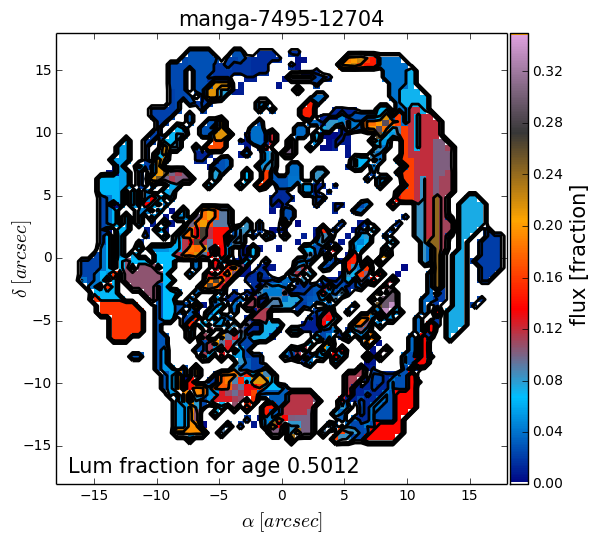

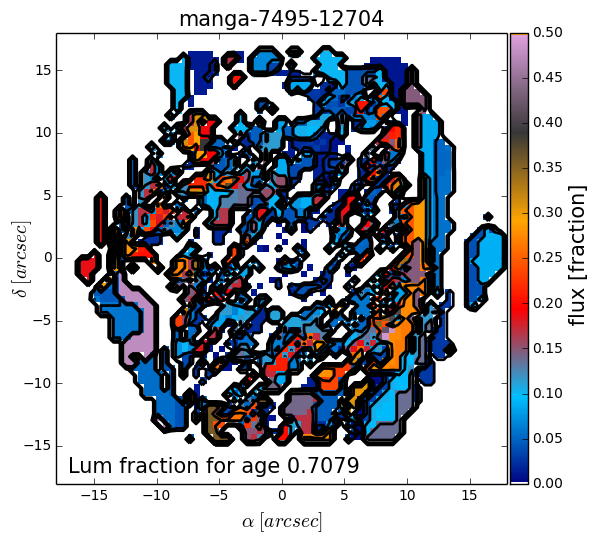

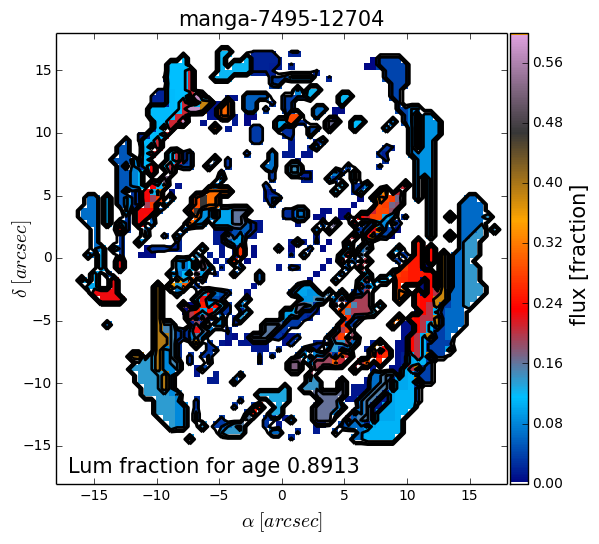

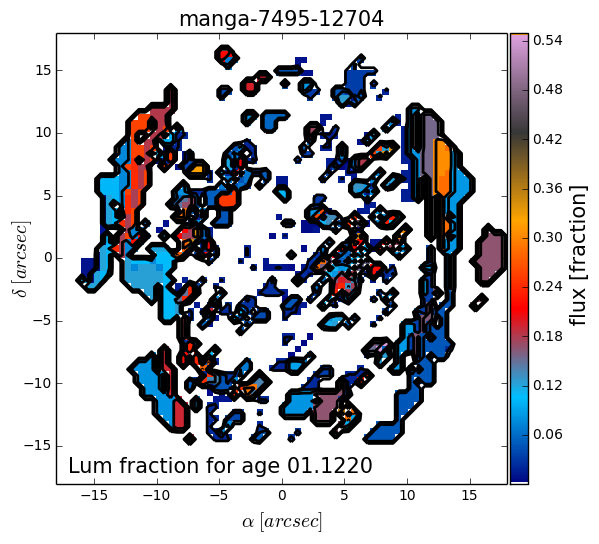

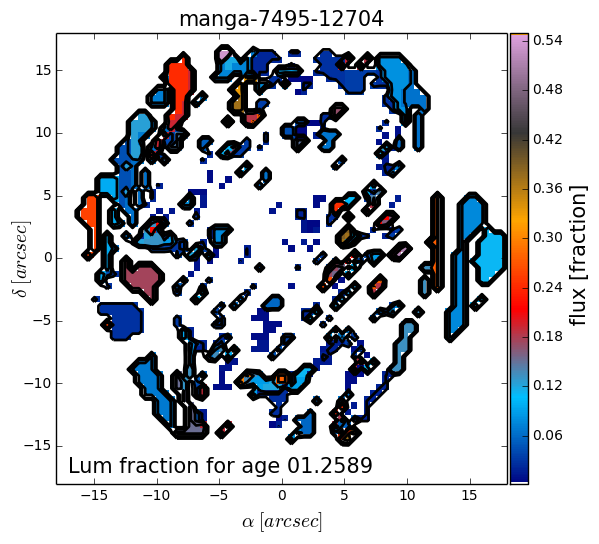

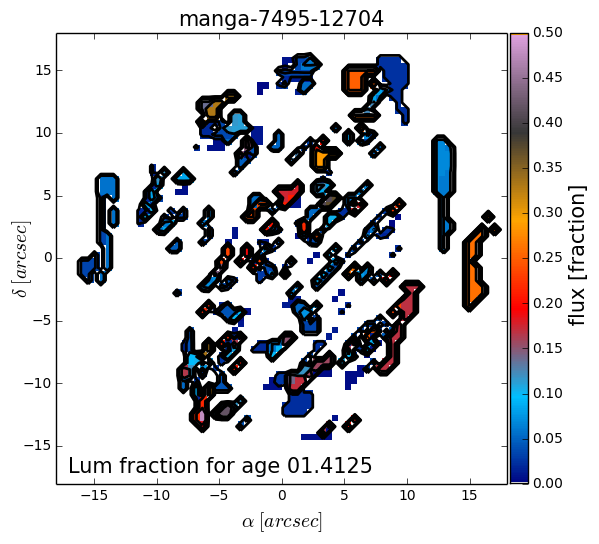

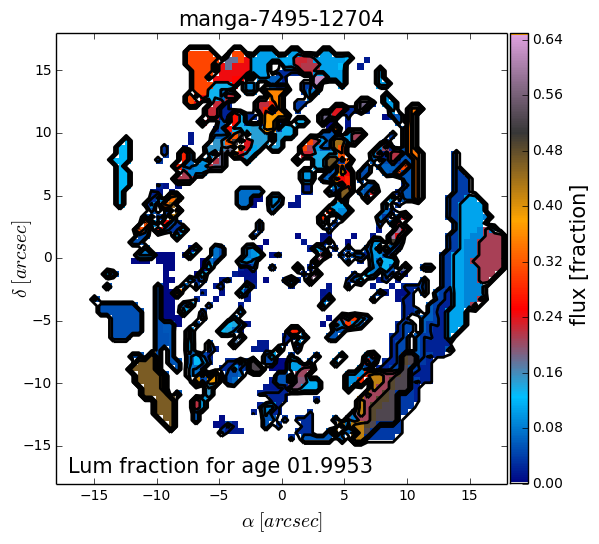

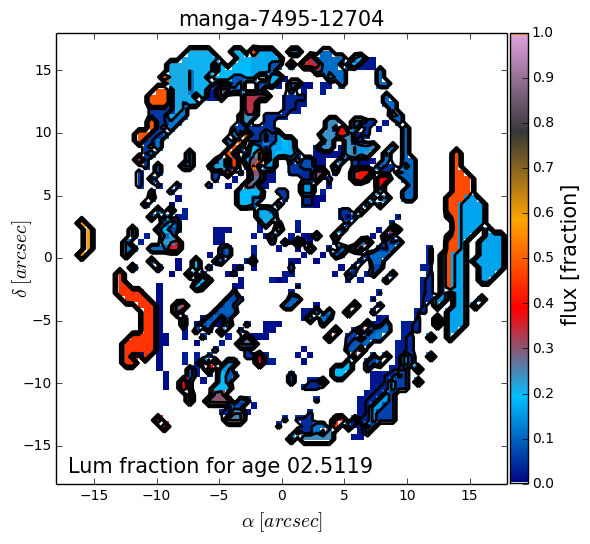

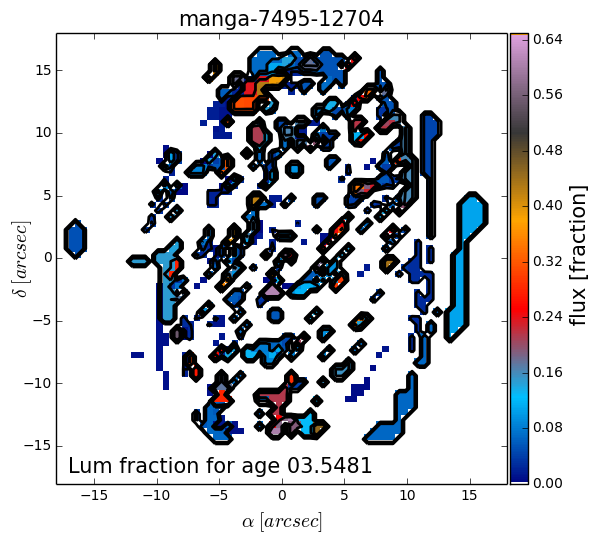

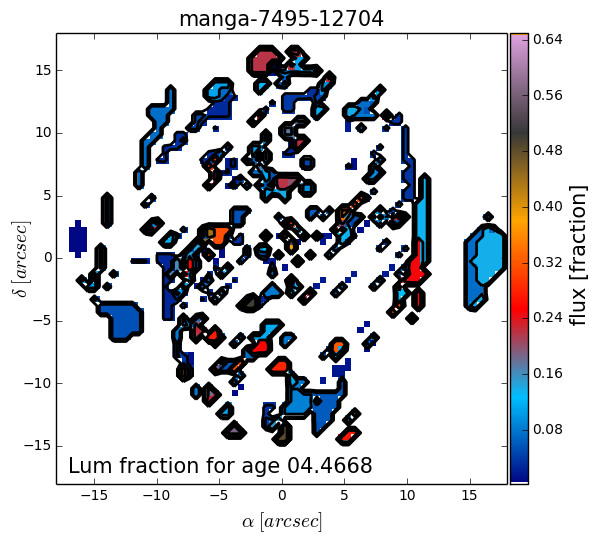

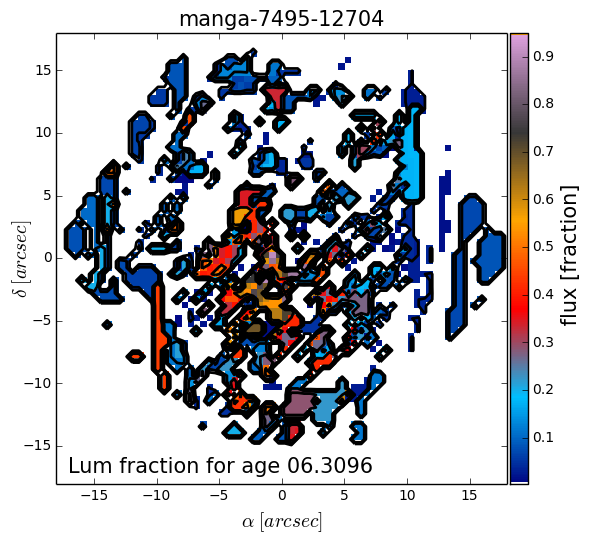

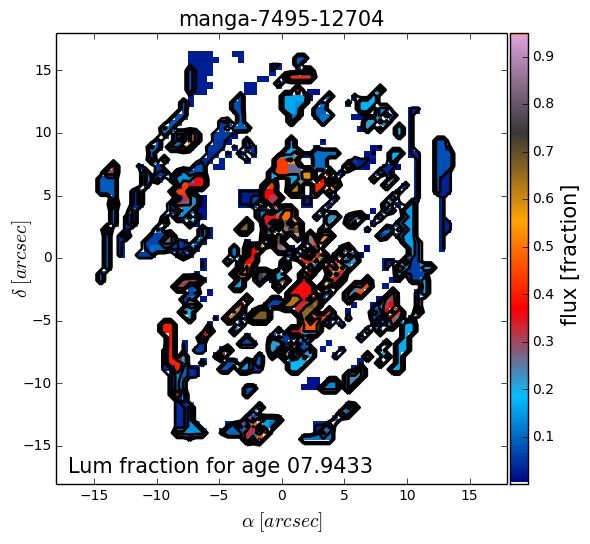

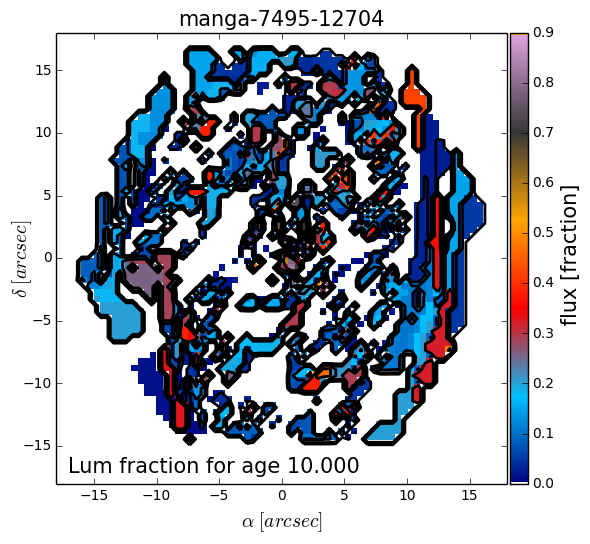

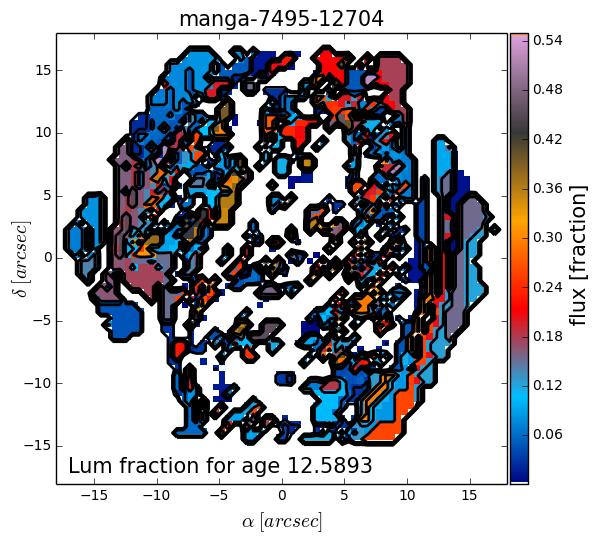

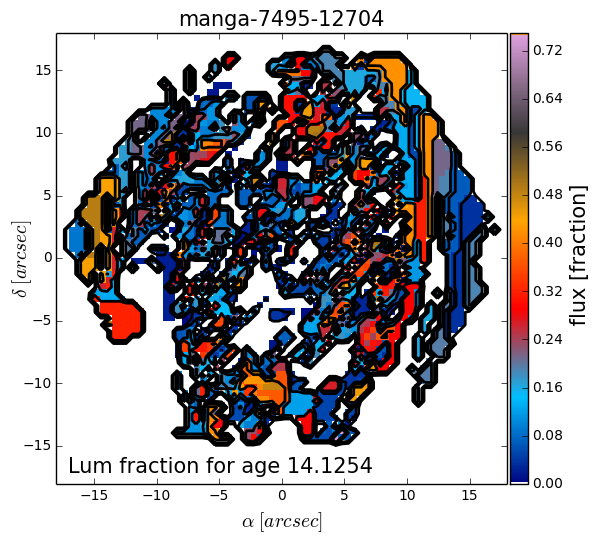

In [13]:
n_age=39
nx,ny=M_m.shape
frac=np.zeros([n_age,nx,ny])
for i in range(0, n_age):
    frac[i,:,:]=fn.plot_maps(manga_name,type="Flux Fractions",path_bin=path_b,dir_data="files",dir_p="plots",plot=2,outp=1,hdu=2,channel=156+i)

Finally, we obtain the total flux fractions at each time step of the stellar library for all the spaxels with a SNR greater than 20. The Funtion <b>get_ages</b> extract the age information from the header of the file:

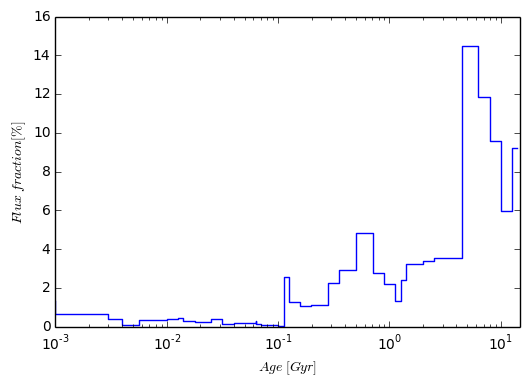

In [55]:
LF=np.zeros(n_age)
ages,dages=fn.get_ages(manga_name,dir_data="files")
for i in range(0, n_age):
    temp=frac[i,:,:]*S_m
    temp[np.where(temp==0)]=np.nan
    nt=np.where(SN_m > 20)
    LF[i]=np.nansum(temp[nt])/np.nansum(S_m[nt])
    
import matplotlib.pyplot as plt
plt.xlabel(r'$Age\ [Gyr]$')
plt.ylabel(r'$Flux\ fraction [\%]$')
plt.xlim(0.001,15)
plt.semilogx(ages,LF*100,drawstyle='steps')
plt.show()